In [ ]:
import os

os.getcwd()

'/home/jupyter'

In [ ]:
os.chdir('/home/jupyter')

In [ ]:
!nvidia-smi

Fri Apr 26 19:25:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              57W / 400W |  21323MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Version:", torch.version.cuda)
    print("CUDA Device Name:", torch.cuda.get_device_name(0))


PyTorch Version: 2.1.2+cu121
CUDA Available: True
CUDA Version: 12.1
CUDA Device Name: NVIDIA A100-SXM4-40GB


In [ ]:
import sys

# Install or upgrade jupyter and ipywidgets using the current Python executable
!pip install --upgrade jupyter ipywidgets

# Enable the widgetsnbextension using the current Python executable
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!python -m pip install --upgrade pip
!pip install matplotlib -U

In [ ]:
!pip install  datasets
# !pip install -q git+https://github.com/huggingface/transformers.git@add-model-idefics
!pip install transformers==4.37.2  -U
!pip install  bitsandbytes sentencepiece==0.1.99 accelerate==0.21.0 loralib
!pip install  peft
!pip install hf_transfer  -U
!pip install pickleshare

In [ ]:
import os

if not os.path.isdir("LLaVA"):
    !git clone https://github.com/haotian-liu/LLaVA.git
else:
    print("LLaVA directory already exists. Skipping clone.")

LLaVA directory already exists. Skipping clone.


In [ ]:
import re

# Define the path to the builder.py file
file_path = 'LLaVA/llava/model/builder.py'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Regular expression to find the block between 'vision_tower = model.get_vision_tower()' and 'image_processor = vision_tower.image_processor'
pattern_block = (
    r'(vision_tower = model.get_vision_tower\(\)\n)'
    r'.*?'  # Non-greedy match for any characters (including newlines) between the two markers
    r'(image_processor = vision_tower.image_processor)'
)

replacement_block = (
    r'\1'  # Keep the starting line unchanged
    '        if not vision_tower.is_loaded:\n'
    '            print(\'vision_tower is not loaded so loading it now\')\n'
    '            vision_tower.load_model(device_map=device_map)\n'
    '            vision_tower.to(device=device, dtype=torch.bfloat16)\n'
    '        else:\n'
    '            print(\'vision_tower is loaded\')\n'
    r'        \2'  # Keep the ending line unchanged
)

# Replace the specific block
content = re.sub(pattern_block, replacement_block, content, flags=re.DOTALL)

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.write(content)

print('The script has been updated successfully.')


The script has been updated successfully.


In [ ]:
import re

# Define the path to the builder.py file
file_path = 'LLaVA/llava/model/builder.py'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Regular expression to find 'float16' not preceded by 'b'
pattern = r'(?<!b)float16'

# Check if there are any matches
if re.search(pattern, content):
    # Replace 'float16' with 'bfloat16'
    modified_content = re.sub(pattern, 'bfloat16', content)

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.write(modified_content)

    print('All necessary instances of float16 have been replaced with bfloat16 in', file_path)
else:
    print('No replacement needed. All instances of float16 already have \'b\' before them.')

No replacement needed. All instances of float16 already have 'b' before them.


In [ ]:
os.getcwd()

'/home/jupyter'

In [ ]:
%cd LLaVA

/home/jupyter/LLaVA


In [ ]:
!pip install -e .
# # !pip install -e . #to see the install logs

In [1]:
# # !git pull
# # !pip install -e . -q

# !pip install protobuf -q -U
# !pip install --upgrade Pillow -q
# !pip install -e ".[train]" -q
# !pip install flash-attn --no-build-isolation -q

# # IT'S RECOMMENDED TO RESTART THE KERNEL TO ENSURE UPDATED PACKAGES ARE LOADED, THEN RUN THE CELLS BELOW

## Load the model

In [ ]:
# Allows for faster downloading.
%env HF_HUB_ENABLE_HF_TRANSFER=1

env: HF_HUB_ENABLE_HF_TRANSFER=1


In [ ]:
import torch
from datasets import load_dataset
from peft import LoraConfig, get_peft_model
from PIL import Image
import transformers
from transformers import AutoProcessor, Trainer, TrainingArguments, BitsAndBytesConfig
import torchvision.transforms as transforms

[2024-04-28 11:03:11,139] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
# !pip install flash-attn --no-build-isolation


In [ ]:
# import sys
# sys.executable

'/opt/conda/envs/test_install/bin/python'

In [ ]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

device = "cuda" if torch.cuda.is_available() else "cpu"


# LLaVA 1.6B
model_path = "liuhaotian/llava-v1.6-vicuna-7b"

model_name=get_model_name_from_path(model_path)

tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=model_name,
    cache_dir='',
    use_flash_attn=True,
)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
/opt/conda/envs/llava1.5env/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/opt/conda/envs/llava1.5env/lib/python3.8/site-packages/torch/nn/modules/module.py:2025: UserWarning: for vision_model.embeddings.class_embedding: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {k

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

vision_tower is loaded


In [ ]:
# import sys
# !{sys.executable} -m pip install flash-attn --no-build-isolation


In [ ]:
# try:
#     import flash_attn
#     print("flash_attn successfully imported!")
# except ImportError as e:
#     print(f"Failed to import flash_attn: {e}")



Failed to import flash_attn: No module named 'flash_attn'


In [ ]:
# !{sys.executable} -m pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Examination

In [ ]:
print(model)

LlavaLlamaForCausalLM(
  (model): LlavaLlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaFlashAttention2(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): Llam

In [ ]:
# print(processor)

In [ ]:
print(model.config)
print(tokenizer.pad_token_id)
print(tokenizer)

LlavaConfig {
  "_name_or_path": "liuhaotian/llava-v1.6-vicuna-7b",
  "architectures": [
    "LlavaLlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "freeze_mm_mlp_adapter": false,
  "freeze_mm_vision_resampler": false,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "image_aspect_ratio": "anyres",
  "image_crop_resolution": 224,
  "image_grid_pinpoints": [
    [
      336,
      672
    ],
    [
      672,
      336
    ],
    [
      672,
      672
    ],
    [
      1008,
      336
    ],
    [
      336,
      1008
    ]
  ],
  "image_split_resolution": 224,
  "initializer_range": 0.02,
  "intermediate_size": 11008,
  "max_position_embeddings": 4096,
  "mm_hidden_size": 1024,
  "mm_patch_merge_type": "spatial_unpad",
  "mm_projector_lr": null,
  "mm_projector_type": "mlp2x_gelu",
  "mm_resampler_type": null,
  "mm_use_im_patch_token": false,
  "mm_use_im_start_end": false,
  "mm_vision_select_feature": "patch"

In [ ]:
import torch

# Check dtype of all modules, focusing on those not torch.bfloat16
print("Modules not torch.bfloat16:")
for name, module in model.named_modules():
    if hasattr(module, 'parameters') and list(module.parameters()):
        # Check if any parameter of the module is not bfloat16
        if any(param.dtype != torch.bfloat16 for param in module.parameters()):
            print(f"{name}: {next(module.parameters()).dtype}")
    else:
        # Optionally, acknowledge modules without parameters if needed
        pass

Modules not torch.bfloat16:


In [ ]:
import transformers
import accelerate
import torch

print(f"transformers version: {transformers.__version__}")
print(f"accelerate version: {accelerate.__version__}")
print(f"torch version: {torch.__version__}")


transformers version: 4.37.2
accelerate version: 0.21.0
torch version: 2.1.2+cu121


In [ ]:
# !pip install torch==2.1.2

## Image loading and processing


In [ ]:
import re
import torch
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.transforms.functional import to_pil_image, to_tensor
from PIL import Image
import requests
from io import BytesIO

from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)
from llava.conversation import conv_templates, SeparatorStyle
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from llava.mm_utils import (
    process_images,
    tokenizer_image_token,
    get_model_name_from_path,
)

# Common function to create prompts
def create_prompt(query, model, model_name=model_name, caption=None):
    image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
    if IMAGE_PLACEHOLDER in query:
        if model.config.mm_use_im_start_end:
            query = re.sub(IMAGE_PLACEHOLDER, image_token_se, query)
        else:
            query = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, query)
    else:
        if model.config.mm_use_im_start_end:
            query = image_token_se + "\n" + query
        else:
            query = DEFAULT_IMAGE_TOKEN + "\n" + query

    # print(f"Prompt: in create prompt {query}")

    conv_mode = infer_conv_mode(model_name)
    conv = conv_templates[conv_mode].copy()
    conv.append_message(conv.roles[0], query)
    if caption is not None:
        conv.append_message(conv.roles[1], caption)
    else:
        conv.append_message(conv.roles[1], None)
    return conv.get_prompt()

# Common function to infer conversation mode
def infer_conv_mode(model_name):
    if "llama-2" in model_name.lower():
        return "llava_llama_2"
    elif "mistral" in model_name.lower():
        return "mistral_instruct"
    elif "v1.6-34b" in model_name.lower():
        return "chatml_direct"
    elif "v1" in model_name.lower():
        return "llava_v1"
    elif "mpt" in model_name.lower():
        return "mpt"
    else:
        return "llava_v0"

def load_image(image_input):
    # Check if the input is a string (path or URL)
    if isinstance(image_input, str):
        if image_input.startswith("http") or image_input.startswith("https"):
            response = requests.get(image_input)
            image = Image.open(BytesIO(response.content)).convert("RGB")
        else:
            image = Image.open(image_input).convert("RGB")
    elif isinstance(image_input, Image.Image):
        # Input is already an Image object, return as is
        image = image_input
    else:
        raise ValueError("Unsupported image input type")
    return image

def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

In [ ]:
import torch


def process_images(images, image_processor, model_config):
    processed_images = []
    for image in images:
        processed_output = image_processor(image)
        # Check the type of 'pixel_values'; if it's a list, convert it to a tensor
        if isinstance(processed_output['pixel_values'], list):
            tensor = torch.tensor(processed_output['pixel_values'])
        else:
            tensor = processed_output['pixel_values']
        processed_images.append(tensor)

    # Stack the processed images into a single tensor
    images_tensor = torch.stack(processed_images, dim=0)

    return images_tensor


def process_and_prepare_images(image_files, image_processor, model, device):
    images = load_images(image_files)
    image_sizes = [x.size for x in images]  # Calculate image sizes once

    # Process images and ensure the output is a tensor
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(
        device,
        dtype=torch.bfloat16
    )

    return images_tensor, image_sizes


In [ ]:
# # Assuming `image_processor` is your image processing function and `sample_image` is a single image loaded into memory
# processed_output = image_processor(sample_image)

# # Print the keys in the processed output
# print(processed_output.keys())


## eval model function for generating captions via evaluation

In [ ]:
# import torch
# import re

# def eval_model(tokenizer, model, image_processor, context_len, image_file, query, model_name=model_name, sep=",", temperature=1.0, num_beams=1, max_new_tokens=150):
#     # Model
#     disable_torch_init()

#     # Create prompt using the common function
#     prompt = create_prompt(query, model, model_name)

#     print(f"Prompt: {prompt}")

#     # Process images using the common function
#     if isinstance(image_file, list):
#         images_tensor, image_sizes = process_and_prepare_images(image_file, image_processor, model, model.device)
#     elif isinstance(image_file, str):
#         images_tensor, image_sizes = process_and_prepare_images([image_file], image_processor, model, model.device)
#     else:
#         # If image_file is neither a list nor a string, it's likely an Image object or similar; wrap it in a list
#         images = [image_file]
#         images_tensor, image_sizes = process_and_prepare_images(images, image_processor, model, model.device)

#     # Tokenize the prompt using the custom tokenizer_image_token function
#     input_ids = (
#         tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
#         .unsqueeze(0)
#         .to(model.device)
#     )

#     # print(images_tensor.size())

#     with torch.inference_mode():
#         output_ids = model.generate(
#             input_ids,
#             images=images_tensor,
#             image_sizes=image_sizes,
#             do_sample=temperature != 1.0,
#             temperature=temperature,
#             # top_p=top_p,
#             num_beams=num_beams,
#             max_new_tokens=max_new_tokens,
#             use_cache=True,
#         )

#     outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=False)[0].strip()
#     print(outputs)

In [ ]:
import torch
import re

def eval_model(tokenizer, model, image_processor, context_len, image_file, query, model_name=model_name, sep=",", temperature=1.0, num_beams=1, max_new_tokens=150):
    # Model setup
    disable_torch_init()

    # Create prompt using the common function
    prompt = create_prompt(query, model, model_name)

    # Process images using the common function
    if isinstance(image_file, list):
        images_tensor, image_sizes = process_and_prepare_images(image_file, image_processor, model, model.device)
    elif isinstance(image_file, str):
        images_tensor, image_sizes = process_and_prepare_images([image_file], image_processor, model, model.device)
    else:
        # If image_file is neither a list nor a string, it's likely an Image object or similar; wrap it in a list
        images = [image_file]
        images_tensor, image_sizes = process_and_prepare_images(images, image_processor, model, model.device)

    # Tokenize the prompt using the custom tokenizer_image_token function
    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .to(model.device)
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=temperature != 1.0,
            temperature=temperature,
            num_beams=num_beams,    #this decides koita sequence generate hobe, num_beams = 1 disi so 1ta sequence generate hobe
            max_new_tokens=max_new_tokens,
            use_cache=True,
        )

    # Decode the output, removing special tokens for cleaner captions
    outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    return outputs


### Method to test the model's inference

In [ ]:
os.getcwd()

'/home/jupyter/LLaVA'

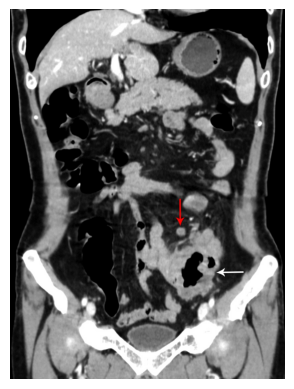

Prompt: A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions. USER: <image>
What do you see in this picture? ASSISTANT:


/var/tmp/ipykernel_8579/4265429433.py:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  tensor = torch.tensor(processed_output['pixel_values'])


<s> The image appears to be a medical scan, likely an X-ray or CT scan, showing the abdominal area of a person. There are several areas highlighted with arrows, which are typically used to indicate areas of interest or concern. The red arrow points to a region that might be of interest to a medical professional, possibly indicating a mass or an area of concern that requires further investigation. The other arrows seem to be pointing to other areas of interest, but without additional context, it's difficult to determine what they are specifically highlighting. It's important to note that medical imaging should only be interpreted by qualified medical professionals.</s>


In [ ]:
import requests
from PIL import Image
from io import BytesIO


image_url = '/home/jupyter/imageCLEF 2024 subset/Train/ImageCLEFmedical_Caption_2024_train_000038.jpg'
image = Image.open(image_url).convert("RGB")



image=load_image(image_url)

import matplotlib.pyplot as plt
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# pass the processed image to eval_model
eval_model(
    tokenizer,
    model,
    image_processor,
    context_len,
    image,  # Use the processed image
    "What do you see in this picture?"
)

In [ ]:
# os.chdir('/home/jupyter/LLaVA')

In [ ]:
os.getcwd()

'/home/jupyter/LLaVA'

# Finetuning dataset

Prepare the dataset that will be used for finetuning

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict, Features, Value, Image

In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
from torch.nn.utils.rnn import pad_sequence

def tokenize_and_create_labels(example_batch, image_processor, tokenizer, model, device, model_name=model_name, ignore_index=-100, image_token_index=IMAGE_TOKEN_INDEX):
    pad_token_id = tokenizer.pad_token_id
    image_files = example_batch['image']

    images_tensor, image_sizes = process_and_prepare_images(image_files, image_processor, model, device)

    query = "What do you see in this picture?"

    # Tokenize the conversation without the captions to determine which tokens to ignore
    tokenized_conversations_without_caption = [
        tokenizer_image_token(create_prompt(query, model, model_name, None), tokenizer, image_token_index, return_tensors="pt")
        for _ in example_batch['caption']
    ]

    # Tokenize the full conversations with the captions
    tokenized_conversations_with_caption = [
        tokenizer_image_token(create_prompt(query, model, model_name, caption), tokenizer, image_token_index, return_tensors="pt")
        for caption in example_batch['caption']
    ]

    # Pad the tokenized conversations to the same length
    input_ids = pad_sequence([tcwc.squeeze(0) for tcwc in tokenized_conversations_with_caption], batch_first=True, padding_value=pad_token_id).to(device)

    # Create attention_mask (1 for real tokens and 0 for padding tokens)
    attention_mask = (input_ids != pad_token_id).long().to(device)

    # Create the labels tensor which is a copy of input_ids but with ignore_index for non-caption tokens
    labels = torch.full_like(input_ids, fill_value=ignore_index)
    for i, tcwc in enumerate(tokenized_conversations_without_caption):
        # Set ignore_index for the tokens corresponding to the conversation without the caption
        input_id_without_caption = tcwc.squeeze(0)
        labels[i, len(input_id_without_caption):] = input_ids[i, len(input_id_without_caption):]

    inputs = {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "images": images_tensor,
        "image_sizes": image_sizes,
        "labels": labels,
    }

    return inputs

# Make sure to define the function outside of the lambda to ensure it's serializable
def transform_batch(batch):
    return tokenize_and_create_labels(batch, image_processor, tokenizer, model, device, model_name)

# load and prepare dataset
ds = load_dataset("HoqueMahmudul/clef2024_train_valid_a")

train_ds = ds["train"]
eval_ds = ds["test"]

# print(train_ds)
# print(eval_ds)

# Apply the transformation function to the dataset
train_ds.set_transform(transform_batch)
eval_ds.set_transform(transform_batch)

Parameter 'transform'=<function transform_batch at 0x7f3c66fbee50> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


#### Addressing the Attention Mask Warning and Pad Token ID

In [ ]:
# from torch.nn.utils.rnn import pad_sequence

# def tokenize_and_create_labels(example_batch, image_processor, tokenizer, model, device, model_name=model_name, ignore_index=-100, image_token_index=IMAGE_TOKEN_INDEX):
#     pad_token_id = tokenizer.pad_token_id
#     image_files = example_batch['image']

#     images_tensor, image_sizes = process_and_prepare_images(image_files, image_processor, model, device)

#     query = "What do you see in this picture?"

#     # Tokenize the conversation without the captions to determine which tokens to ignore
#     tokenized_conversations_without_caption = [
#         tokenizer_image_token(create_prompt(query, model, model_name, None), tokenizer, image_token_index, return_tensors="pt")
#         for _ in example_batch['caption']
#     ]

#     # Tokenize the full conversations with the captions
#     tokenized_conversations_with_caption = [
#         tokenizer_image_token(create_prompt(query, model, model_name, caption), tokenizer, image_token_index, return_tensors="pt")
#         for caption in example_batch['caption']
#     ]

#     # Pad the tokenized conversations to the same length
#     input_ids = pad_sequence([tcwc.squeeze(0) for tcwc in tokenized_conversations_with_caption], batch_first=True, padding_value=pad_token_id).to(device)

#     # Create attention_mask (1 for real tokens and 0 for padding tokens)
#     attention_mask = (input_ids != pad_token_id).long().to(device)

#     # Create the labels tensor which is a copy of input_ids but with ignore_index for non-caption tokens
#     labels = torch.full_like(input_ids, fill_value=ignore_index)
#     for i, tcwc in enumerate(tokenized_conversations_without_caption):
#         # Set ignore_index for the tokens corresponding to the conversation without the caption
#         input_id_without_caption = tcwc.squeeze(0)
#         labels[i, len(input_id_without_caption):] = input_ids[i, len(input_id_without_caption):]

#     inputs = {
#         "input_ids": input_ids,
#         "attention_mask": attention_mask,
#         "images": images_tensor,
#         "image_sizes": image_sizes,
#         "labels": labels,
#     }

#     return inputs

# # Make sure to define the function outside of the lambda to ensure it's serializable
# def transform_batch(batch):
#     return tokenize_and_create_labels(batch, image_processor, tokenizer, model, device, model_name)

# # load and prepare dataset
# ds = load_dataset("HoqueMahmudul/test")

# train_ds = ds["train"]
# eval_ds = ds["test"]

# # print(train_ds)
# # print(eval_ds)

# # Apply the transformation function to the dataset
# train_ds.set_transform(transform_batch)
# eval_ds.set_transform(transform_batch)

In [ ]:
# for batch in eval_ds:
#     print(batch)

# LoRA


In [ ]:
# Mistral
print(model)

LlavaMistralForCausalLM(
  (model): LlavaMistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
    (norm): Mistr

In [ ]:
# Vicuna-llama
print(model)

LlavaLlamaForCausalLM(
  (model): LlavaLlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaR

In [ ]:
import math

config = LoraConfig(
    r=32,
    lora_alpha = 32 * math.sqrt(32), # this will set the rescaled learning rate to LR * alpha / sqrt (r), with r the rank.
    target_modules=[
        "q_proj", "k_proj", "v_proj", # attention mechanisms
        "fc1", "fc2", #for llama,
        "mm_projector.0", #for mistral, train instead "mm_projector" - Adapt the multimodal projection layer for better visual-textual alignment
        "mm_projector.2",
        "up_proj", "down_proj","gate_proj" #Adapt MLP components within transformer blocks, optionally train more linear layers
        ],
    lora_dropout=0.05,
    bias="none",
)
model = get_peft_model(model, config)

In [ ]:
# List to hold the names of the trainable parameters
set_other_trainable=True

if set_other_trainable:
    trainable_params_names = ['lm_head','embed_tokens']
    # trainable_params_names = None

    # Set modules to be trainable
    for n, p in model.named_parameters():
        if any(k in n for k in trainable_params_names):
            p.requires_grad_(True)
        # else:
        #     p.requires_grad_(False)  # Optional: Set the rest to be not trainable

    # Make a dictionary of trainable parameters
    trainable_params = {n: p for n, p in model.named_parameters() if p.requires_grad}

    # Convert trainable_params to state_dict format
    trainable_params_state_dict = {n: p.data for n, p in trainable_params.items()}

In [ ]:
model.print_trainable_parameters()

trainable params: 346,718,208 || all params: 7,147,481,088 || trainable%: 4.850914661139989


# Pre-Training Evaluation

In [ ]:
from PIL import Image

In [2]:
# import matplotlib.pyplot as plt

# # Temporarily disable the transformation to access the original data
# eval_ds.reset_format()

# # Limit the number of images to process
# num_images_to_process = 5

# # Iterate over each example in the evaluation dataset, but only up to num_images_to_process
# for i in range(min(num_images_to_process, len(eval_ds))):
#     # Access the original image and caption for the current row
#     image = eval_ds[i]['image']
#     caption = eval_ds[i]['caption']

#     # Display the image using matplotlib
#     plt.imshow(image)
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.show()

#     # Evaluate the model for the given image
#     eval_model(
#         tokenizer,
#         model,
#         image_processor,
#         context_len,
#         image,
#         "What do you see in this picture?"
#     )

#     # Print the correct caption
#     print(f"\nCorrect caption: {caption}\n\n")

# # Re-enable the transformation if needed
# eval_ds.set_transform(lambda batch: tokenize_and_create_labels(batch, image_processor, tokenizer, model, device))


# Training



In [ ]:
batch_size = 4  # Specify the batch size

In [ ]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_ds is your training dataset prepared as a PyTorch Dataset object
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Assuming train_loader is your DataLoader instance for the training dataset
for batch in train_loader:
    print(batch.keys())  # Print the dictionary keys to see what data is included in a batch

    # If 'images' is a key, this indicates that images are being loaded
    if 'images' in batch:
        print("Images are included in the DataLoader.")
        print(f"Batch 'images' shape: {batch['images'].shape}")  # Print the shape of the images tensor

    # Similarly, check for other expected keys, like 'input_ids' and 'attention_mask'
    if 'input_ids' in batch and 'attention_mask' in batch:
        # Print the first row of input_ids to check for out-of-range token IDs
        input_ids_first_row = batch['input_ids'][1]
        print(f"First row of 'input_ids': \n{input_ids_first_row.tolist()}")

        # # Check if any token IDs are out of range
        # vocab_size = tokenizer.vocab_size
        # out_of_range_tokens = [token_id for token_id in input_ids_first_row if token_id >= vocab_size]
        # if out_of_range_tokens:
        #     print(f"Out-of-range token IDs: {out_of_range_tokens}")

        # # Decode the first row of input_ids to text, if all token IDs are in range
        # if not out_of_range_tokens:
        #     decoded_inputs = tokenizer.decode(input_ids_first_row, skip_special_tokens=False)
        #     print(f"Decoded input tokens: {decoded_inputs}")
        # else:
        #     print("Cannot decode input_ids due to out-of-range token IDs.")

        print("Text inputs are included in the DataLoader.")
        print(f"Batch 'input_ids' shape: {batch['input_ids'].shape}")
        print(f"Batch 'attention_mask' shape: {batch['attention_mask'].shape}")

        # # Decode the first row of input_ids to text
        # decoded_inputs = tokenizer.decode(batch['input_ids'][0], skip_special_tokens=False)
        # print(f"Decoded input tokens: {decoded_inputs}")

        # Print the first row of labels, replacing ignore_index with the string '[IGNORE]'
        labels = batch['labels'][1].tolist()
        labels_str = ['[IGNORE]' if label == -100 else str(label) for label in labels]
        print(f"Labels: {labels_str}")

        # Print the first row of the attention_mask
        attention_mask_str = batch['attention_mask'][1].tolist()
        print(f"Attention mask: {attention_mask_str}")

    # Optionally, display an image from the batch to visually confirm loading
    if 'images' in batch:
        image_tensor = batch['images'][1]
        print(f"First Row Image Data type: {image_tensor.dtype}")
        print(f"First Row Image Shape: {image_tensor.shape}")
        print(f"First Row Image Value range: [{image_tensor.min()}, {image_tensor.max()}]")

    break  # Only check the first batch

/var/tmp/ipykernel_10744/4265429433.py:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  tensor = torch.tensor(processed_output['pixel_values'])


dict_keys(['input_ids', 'attention_mask', 'images', 'image_sizes', 'labels'])
Images are included in the DataLoader.
Batch 'images' shape: torch.Size([4, 1, 3, 336, 336])
First row of 'input_ids': 
[1, 319, 13563, 1546, 263, 12758, 5199, 322, 385, 23116, 21082, 20255, 29889, 450, 20255, 4076, 8444, 29892, 13173, 29892, 322, 1248, 568, 6089, 304, 278, 5199, 29915, 29879, 5155, 29889, 3148, 1001, 29901, 29871, -200, 29871, 13, 5618, 437, 366, 1074, 297, 445, 7623, 29973, 319, 1799, 9047, 13566, 29901, 12699, 284, 1776, 310, 2343, 322, 315, 29899, 1028, 457, 515, 11247, 3970, 29990, 6445, 385, 633, 8945, 315, 29906, 24241, 1182, 284, 3573, 411, 10757, 310, 1014, 29880, 1314, 362, 29889, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Text inputs are included in the DataLoader.
Batch 'input_ids' shape: torch.Size([4, 104])
Batch 'attention_mask' shape: torch.Size([4, 104])
Labels: ['[IGNORE]', '[IGNORE]', '[IGNORE]', '[IGNORE]', '[IGNORE]', '[IGNORE]', '[IGNORE]', '[IGNORE]'

In [ ]:
# type(images_tensor)

In [ ]:
print(IMAGE_TOKEN_INDEX)

-200


In [ ]:
# output_sample=[1, 733, 16289, 28793, 28705, 28705, 13, 3195, 511, 368, 1032, 297, 456, 5754, 28804, 733, 28748, 16289, 28793, 330, 2692, 2687, 287, 12019, 28705, 2, 0, 0, 0, 0]
# print(tokenizer.decode(output_sample))

<s> [INST]  
What do you see in this picture? [/INST] A single black bishop </s><unk><unk><unk><unk>


In [ ]:
# test_query = "[INST] <image>\nWhat do you see in this picture? [/INST]"

# image_token_se = DEFAULT_IMAGE_TOKEN

# print(f"image_token_se is: {image_token_se}")

# print(tokenizer_image_token(test_query, tokenizer, IMAGE_TOKEN_INDEX))

# Training Arguments

In [ ]:
from transformers import TrainerCallback, EarlyStoppingCallback

In [ ]:
# # clear chache to empty memory

# torch.cuda.empty_cache()

In [ ]:
# Define a custom callback
class PrintBestCheckpointCallback(TrainerCallback):
    def on_train_end(self, args, state, control, **kwargs):
        # Print the path of the best checkpoint at the end of training
        print(f"Best model checkpoint: {state.best_model_checkpoint}")

In [ ]:
batch_size = 4  # Specify the batch size you want to use
specific_directory = "/home/jupyter/Models"
output_model_name = f"{specific_directory}/{model_name}-latest-Vicuna"

# # Get the latest checkpoint if it exists
# latest_checkpoint = get_latest_checkpoint(output_model_name)

resume_from_checkpoint=True,  # Will automatically resume from the last checkpoint



In [ ]:
# from torch.nn import CrossEntropyLoss

# def compute_loss(model, inputs, return_outputs=False):
#     labels = inputs.pop("labels")
#     outputs = model(**inputs)
#     logits = outputs.logits
#     loss_fct = CrossEntropyLoss(ignore_index=ignore_index)
#     loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
#     return (loss, outputs) if return_outputs else loss


training_args = TrainingArguments(
    output_dir=output_model_name,
    learning_rate=1e-5,
    # fp16=True, #for non ampere gpus
    bf16=True,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=8,
    dataloader_pin_memory=False,
    save_total_limit=10,  # Limit the number of checkpoints to save
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=548,
    eval_steps=548,
    logging_steps=1,
    num_train_epochs=5,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",  # validation loss this is the metric I am monitoring
    greater_is_better=False,
    report_to=None,
    optim="adamw_torch",
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={'use_reentrant':True}
    # resume_from_checkpoint=latest_checkpoint,
    # resume_from_checkpoint=True,  # Will automatically resume from the last checkpoint
)

# Initialize your custom callback
print_best_checkpoint_callback = PrintBestCheckpointCallback()

# Initialize early stopping callback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=4,  # Number of evaluation steps with no improvement after which training will be stopped
    early_stopping_threshold=0.01  # Minimum change needed to qualify as an improvement
)

# Initialize the list of callbacks you want to use
# Combine custom callback with the early stopping callback
callbacks = [print_best_checkpoint_callback, early_stopping_callback]

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=eval_ds,
    # compute_metrics=compute_metrics,
    callbacks=callbacks,  # Add custom callback here
    # compute_loss=compute_loss,  # Pass the custom compute_loss function
)

trainer.train('/home/jupyter/Models/llava-v1.6-vicuna-7b-latest-Vicuna/checkpoint-4384')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mdemo1 (msu_cvi_lab). Use `wandb login --relogin` to force relogin


/opt/conda/envs/llava1.5env/lib/python3.8/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss,Validation Loss
4932,1.967800,1.984532
5480,2.046900,1.953267
6028,1.897300,1.939575
6576,2.017900,1.932810


You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
/opt/conda/envs/llava1.5env/lib/python3.8/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Best model checkpoint: /home/jupyter/Models/llava-v1.6-vicuna-7b-latest-Vicuna/checkpoint-4384


TrainOutput(global_step=6576, training_loss=0.6685205964131367, metrics={'train_runtime': 28807.8649, 'train_samples_per_second': 12.168, 'train_steps_per_second': 0.38, 'total_flos': 1.063026957579264e+18, 'train_loss': 0.6685205964131367, 'epoch': 3.0})

##  Checking Trainer State

In [3]:
# import json
# import matplotlib.pyplot as plt

# # Load the training history
# with open('', 'r') as file:
#     trainer_state = json.load(file)

# # Extract loss values from the trainer_state
# training_steps = []
# training_losses = []
# validation_steps = []
# validation_losses = []

# for log_entry in trainer_state['log_history']:
#     if 'loss' in log_entry and 'step' in log_entry:  # This is a training loss entry
#         training_steps.append(log_entry['step'])
#         training_losses.append(log_entry['loss'])
#     elif 'eval_loss' in log_entry and 'step' in log_entry:  # This is a validation loss entry
#         validation_steps.append(log_entry['step'])
#         validation_losses.append(log_entry['eval_loss'])

# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# # Plot training loss
# ax[0].plot(training_steps, training_losses, label='Training Loss', color='blue')
# ax[0].set_title('Training Loss')
# ax[0].set_ylabel('Loss')
# ax[0].grid(True)

# # Plot validation loss
# ax[1].plot(validation_steps, validation_losses, label='Validation Loss', color='orange')
# ax[1].set_title('Validation Loss')
# ax[1].set_ylabel('Loss')
# ax[1].set_xlabel('Steps')
# ax[1].grid(True)

# # Define the tick values as multiples of 1095, considering the range of your steps
# tick_step = 548
# xticks = range(0, max(max(training_steps, default=0), max(validation_steps, default=0)) + tick_step, tick_step)
# ax[1].set_xticks(xticks)  # Set x-ticks on both subplots

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


### Loading the checkpoint after training

In [ ]:
# OPTIONALLY LOAD A DIFFERENT CHECKPOINT

from peft import PeftModel

adapter_path="/home/jupyter/Models/llava-v1.6-vicuna-7b-latest-Vicuna/checkpoint-4384" #this is the path to the checkpoint to load

## You have a choice now between either A or B:
# A: Unload the current adapter (if this fails, just run option B to load the base model again).
# model.unload()

# B: Re-load the base model
# the variables required to load the base model should already be declared at the top of this script.
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=model_name,
    cache_dir='',
    use_flash_attn=True,
    # load_8bit=True #NOT SUPPORTED YET WITH THIS SCRIPT
    # load_4bit=True #NOT SUPPORTED YET WITH THIS SCRIPT
)

# Now you can load the new model on top.
model = PeftModel.from_pretrained(
    model,
    adapter_path,
)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

vision_tower is loaded


In [ ]:
print(model)

PeftModel(
  (base_model): LoraModel(
    (model): LlavaLlamaForCausalLM(
      (model): LlavaLlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=0)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear(
                (base_layer): Linea

## Eval after Training

In [4]:
# import matplotlib.pyplot as plt

# # Temporarily disable the transformation to access the original data
# eval_ds.reset_format()

# # Limit the number of images to process
# num_images_to_process = 5

# # Iterate over each example in the evaluation dataset, but only up to num_images_to_process
# for i in range(min(num_images_to_process, len(eval_ds))):
#     # Access the original image and caption for the current row
#     image = eval_ds[i]['image']
#     caption = eval_ds[i]['caption']

#     # Display the image using matplotlib
#     plt.imshow(image)
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.show()

#     # Evaluate the model for the given image
#     eval_model(
#         tokenizer,
#         model,
#         image_processor,
#         context_len,
#         image,
#         "What do you see in this picture?"
#     )

#     # Print the correct caption
#     print(f"\nCorrect caption: {caption}\n\n")

# # Re-enable the transformation if needed
# eval_ds.set_transform(lambda batch: tokenize_and_create_labels(batch, image_processor, tokenizer, model, device))


In [5]:
# import matplotlib.pyplot as plt

# # Temporarily disable the transformation to access the original data
# eval_ds.reset_format()

# # Limit the number of images to process
# num_images_to_process = 5

# # Iterate over each example in the evaluation dataset, but only up to num_images_to_process
# for i in range(min(num_images_to_process, len(eval_ds))):
#     # Access the original image and caption for the current row
#     image = eval_ds[i]['image']
#     caption = eval_ds[i]['caption']

#     # Display the image using matplotlib
#     plt.imshow(image)
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.show()

#     # Evaluate the model for the given image
#     eval_model(
#         tokenizer,
#         model,
#         image_processor,
#         context_len,
#         image,
#         "What do you see in this picture?"
#     )

#     # Print the correct caption
#     print(f"\nCorrect caption: {caption}\n\n")

# # Re-enable the transformation if needed
# eval_ds.set_transform(lambda batch: tokenize_and_create_labels(batch, image_processor, tokenizer, model, device))


## Generating CSV from test dataset

In [ ]:
# Example usage with a dataset
ds_test = load_dataset("HoqueMahmudul/test_dataset")

test_ds = ds_test['test']

In [ ]:
captions[3]

('ImageCLEFmedical_Caption_2024_test_000004.jpg',
 '"A glimpse into the intricate network of the human body: a clear view of the digestive system, highlighting the complex interplay of organs and the path of food through the gastrointestinal tract."')

In [ ]:
captions[2]

('ImageCLEFmedical_Caption_2024_test_000003.jpg',
 'Postoperative esophagogram showing the esophagus and the gastric tube in the right thoracic cavity.')

In [6]:
# Accessing items one by one using test_ds[i] can be inefficient, especially for larger datasets.
# If performance is an issue, consider batch processing if your model and infrastructure support it.


# Now iterate through the test dataset to generate captions
captions = []

# Temporarily disable the transformation to access the original data
test_ds.reset_format()

for i in range(len(test_ds)):
    # Access the original image and image name for the current row
    image = test_ds[i]['image']
    image_name = test_ds[i]['image_name']

    # Evaluate the model for the given image to generate a predicted caption using eval_model function
    predicted_caption = eval_model(
        tokenizer,
        model,
        image_processor,
        context_len,
        image,
        "Can you write a caption for this image based on what you see in the image"
    )

    # Append the correct and predicted captions as a tuple to the captions list
    captions.append((image_name, predicted_caption))

# Create a DataFrame from the captions list with the specified column titles
df_captions_generation_test = pd.DataFrame(captions, columns=['ID', 'predicted_caption'])

# Display the DataFrame to verify the contents
print(df_captions_generation_test)

# Optionally, save the DataFrame to a CSV file
df_captions_generation_test.to_csv('/home/jupyter/Test dataset caption/llava-1.6-vicuna-4384-r32.csv', index=False)

# Re-enable the transformation if needed
test_ds.set_transform(lambda batch: tokenize_and_create_labels(batch, image_processor, tokenizer, model, device))

# Finish

### generating csv over  eval set

In [ ]:
import pandas as pd

# Create an empty list to store both correct and predicted captions
captions = []

# Temporarily disable the transformation to access the original data
eval_ds.reset_format()

# # Example evaluation loop can use enumerate as well
# for i, data in enumerate(eval_ds):
#     # Prepare your data here
#     # For example, for an image captioning task:
#     image = data['image']
#     true_caption = data['caption']

# Iterate over each example in the evaluation dataset
for i in range(len(eval_ds)):
    # Access the original image and correct caption for the current row
    image = eval_ds[i]['image']
    correct_caption = eval_ds[i]['caption']

    # Evaluate the model for the given image to generate a predicted caption using eval_model function
    predicted_caption = eval_model(
        tokenizer,
        model,
        image_processor,
        context_len,
        image,
        "What do you see in this picture?"
    )

    # Append the correct and predicted captions as a tuple to the captions list
    captions.append((correct_caption, predicted_caption))

# Create a DataFrame from the captions list with the specified column titles
df_captions = pd.DataFrame(captions, columns=['correct_caption', 'predicted_caption'])

# Display the DataFrame to verify the contents
print(df_captions)

# Optionally, save the DataFrame to a CSV file
df_captions.to_csv('/home/jupyter/captions_comparison.csv', index=False)

# Re-enable the transformation if needed
eval_ds.set_transform(lambda batch: tokenize_and_create_labels(batch, image_processor, tokenizer, model, device))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attentio

                                      correct_caption  \
0   Transabdominal ultrasonography of right lower ...   
1   Ultrasonographic examination of an embryo vesi...   
2   Chest x-ray demonstrating bilateral calcificat...   
3   Transvaginal ultrasonography shows a septate c...   
4                    Showing deployed Sapien 3 valve.   
..                                                ...   
95  Ultrasonography (sagittal view) showing an inc...   
96   Intraoperative fluoroscopy showing positionin...   
97  Computerized tomography scan of the brain in t...   
98  Pulmonary blastomycosis chest X-ray image. Che...   
99  X-ray image of aseptic loosening of the distal...   

                                    predicted_caption  
0   Transabdominal ultrasound showing the presence...  
1   Transverse section of the fetal head at 32 wee...  
2     Chest X-ray showing bilateral pleural effusion.  
3   Transvaginal ultrasound image of the uterus an...  
4   Chest radiograph of a patient w

In [ ]:
# Print the keys of the first item in the dataset
if len(eval_ds) > 0:
    first_item_keys = eval_ds[0].keys()
    print("Available fields in the first item of eval_ds:", first_item_keys)
else:
    print("The dataset is empty.")


Available fields in the first item of eval_ds: dict_keys(['image', 'caption'])


In [7]:
# # Print the first 3 items in the dataset
# for i in range(min(3, len(eval_ds))):
#     print(f"Item {i}:")
#     for key in eval_ds[i].keys():
#         value = eval_ds[i][key]
#         # Since some values can be very large (like tensors), we print their type and size instead of the values themselves
#         if hasattr(value, 'shape'):  # Check if the value is a tensor or similar
#             print(f"  {key}: {type(value)} with shape {value.shape}")
#         else:
#             print(f"  {key}: {value}")
#     print("\n")


In [ ]:
# save the DataFrame to a CSV file
df_predictions.to_csv('/home/jupyter/predicted_captions.csv', index=False)

In [ ]:
# Required when quantizing models/data that are gated on HuggingFace, and required for pushing models to HuggingFace.
!pip install huggingface_hub -q -U
from huggingface_hub import notebook_login

notebook_login()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
model=model.merge_and_unload()

In [1]:
# tokenizer.push_to_hub(f"HoqueMahmudul/{output_model_name}", private=True)